Final Project

SanberCode Data Science Class - Batch 27

Prepare by Muhammad Idil Haq Amir

In [80]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

raw_data = pd.read_csv('Data_Negara_HELP.csv')
raw_data

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [81]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [82]:
raw_data.describe()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [83]:
# handling missing values
raw_data.dropna(axis=0, inplace=True)
raw_data.fillna(method="ffill")

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


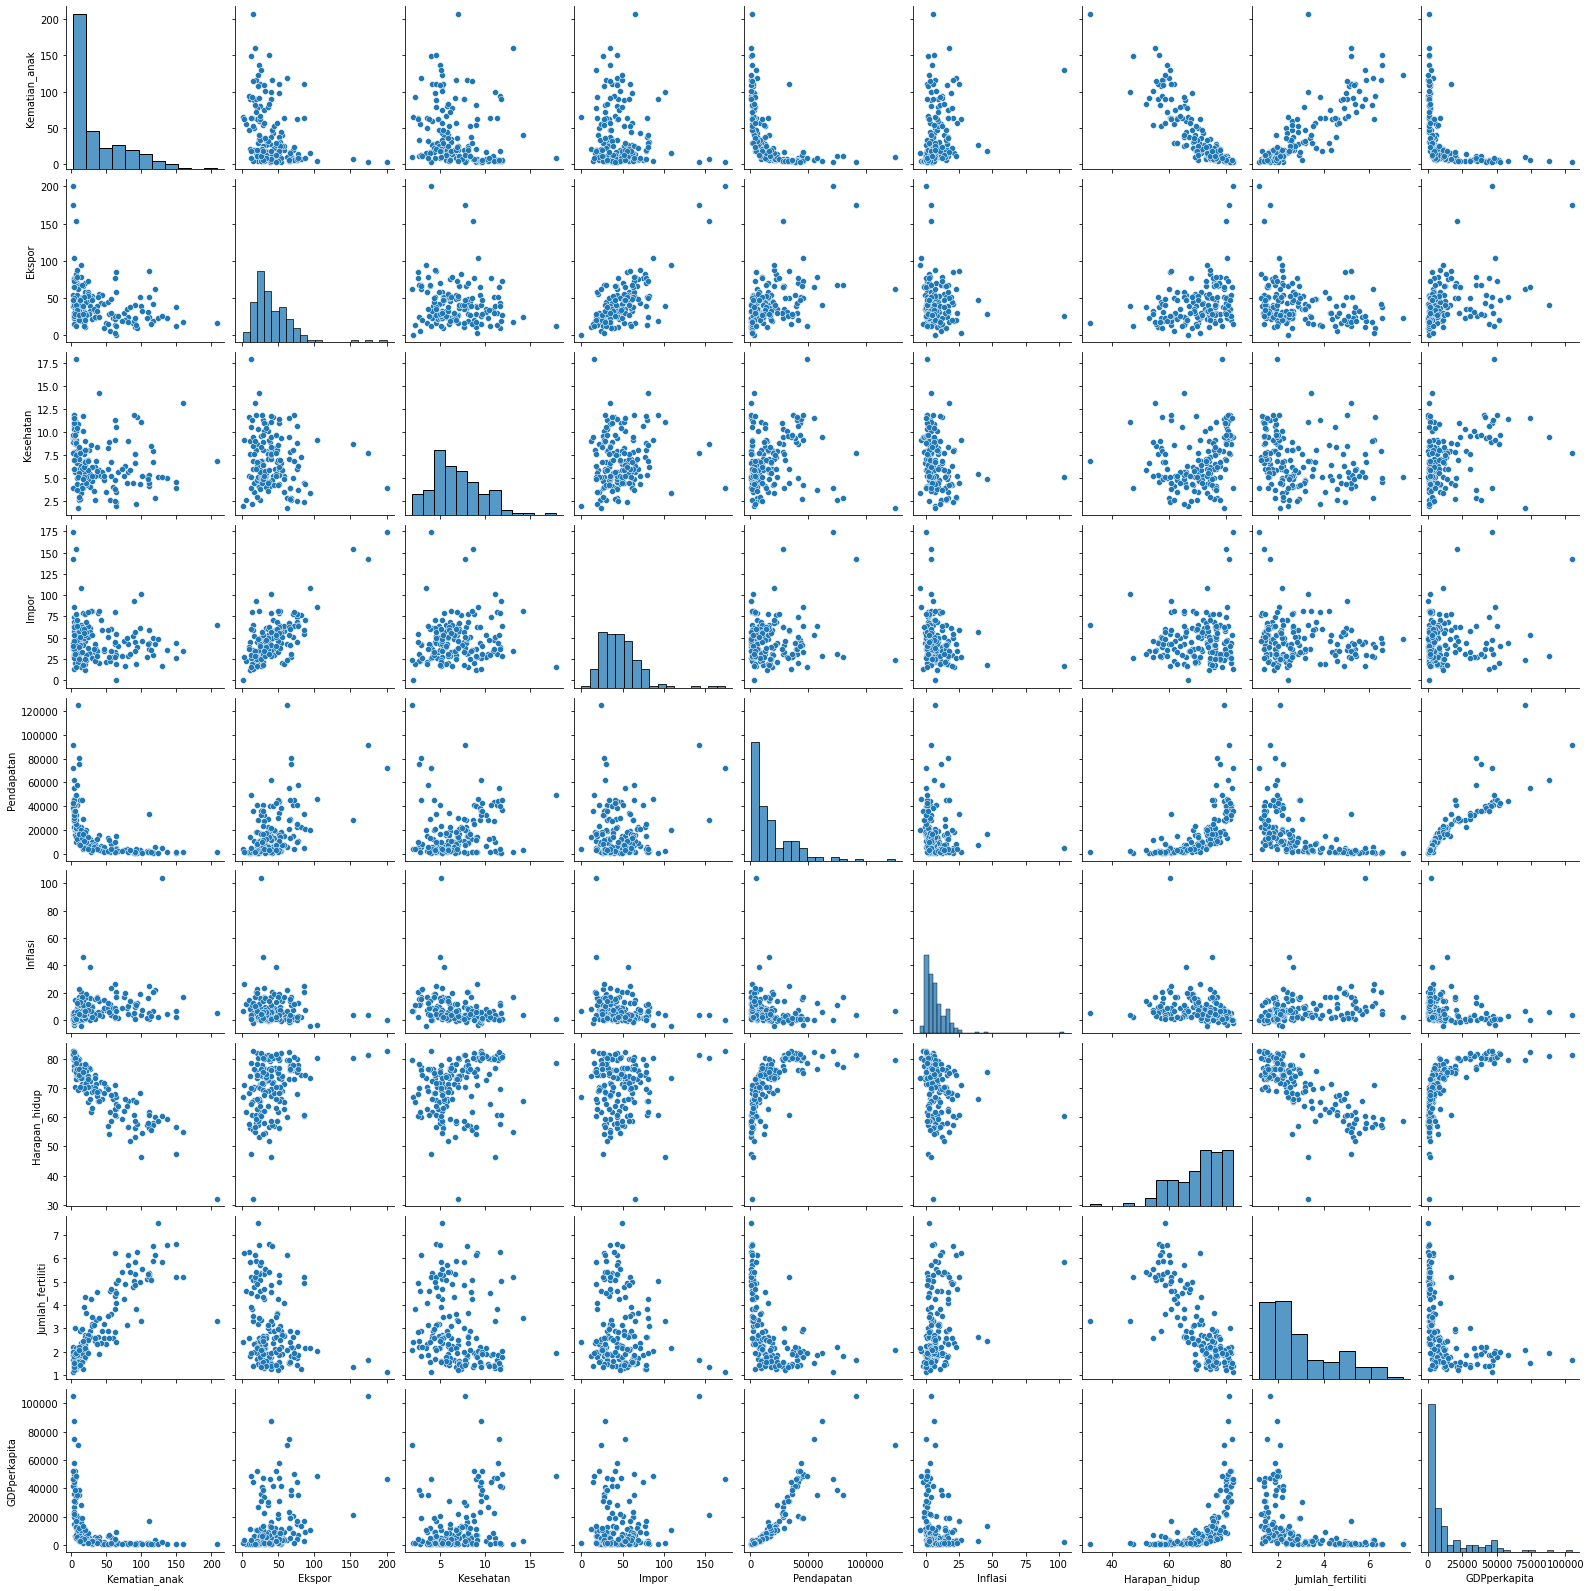

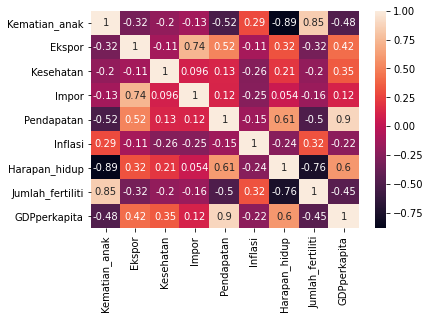

In [84]:
sns.pairplot(raw_data);
plt.show()
sns.heatmap(raw_data.corr(), annot =True, fmt='.2g');
plt.show()

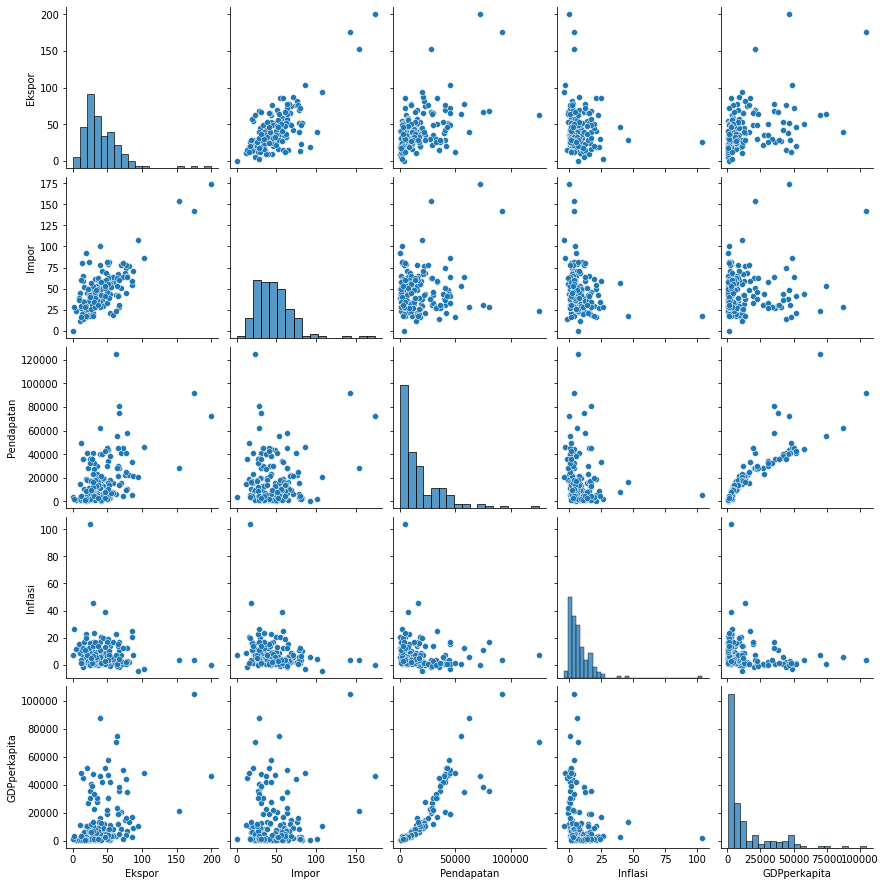

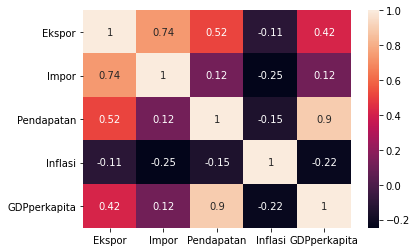

In [ ]:
# analisa hubungan faktor ekonomi
economic_data = raw_data[['Ekspor', 'Impor', 'Pendapatan', 'Inflasi', 'GDPperkapita']]
economic_data

sns.pairplot(economic_data);
plt.show()
sns.heatmap(economic_data.corr(), annot =True, fmt='.2g');
plt.show()

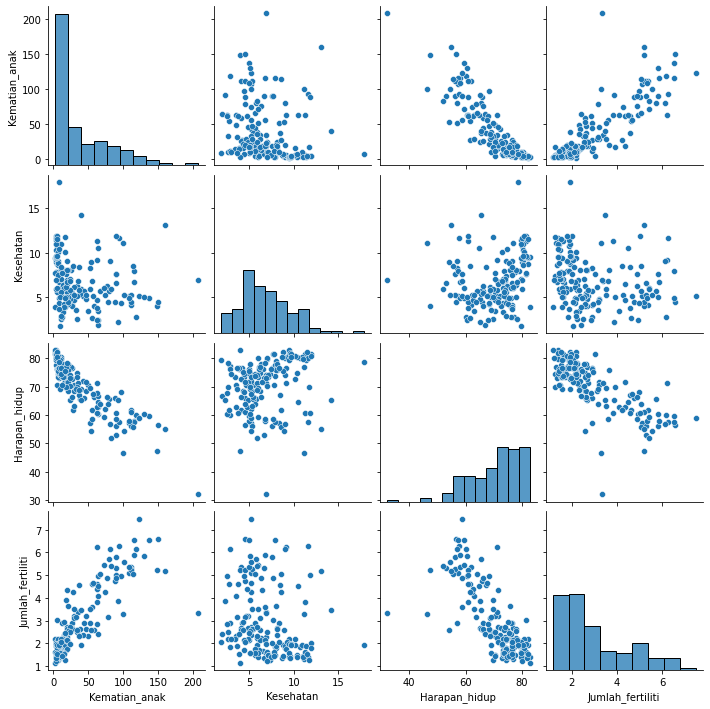

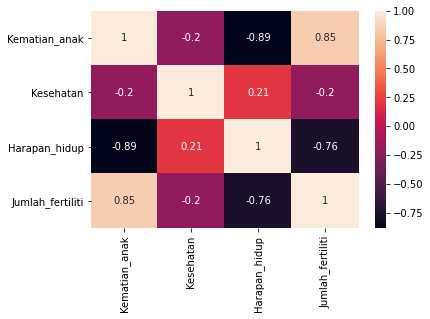

In [ ]:
# analisa hubungan faktor eksosial
social_data = raw_data[['Kematian_anak', 'Kesehatan', 'Harapan_hidup', 'Jumlah_fertiliti']]
social_data

sns.pairplot(social_data);
plt.show()
sns.heatmap(social_data.corr(), annot =True, fmt='.2g');
plt.show()

In [85]:
economic_data = raw_data[['Pendapatan', 'GDPperkapita']]

def remove_outlier(df):
  Q1 = df.quantile(0.25)
  Q3 = df.quantile(0.75)
  IQR = Q3-Q1
  df_final = df[~((df<(Q1-(1.5*IQR))) | (df>(Q3+(1.5*IQR))))]
  return df_final

economic_data_new = remove_outlier(economic_data)
economic_data_new.dropna(axis=0, inplace=True)

Before


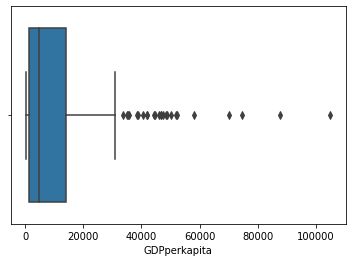

After


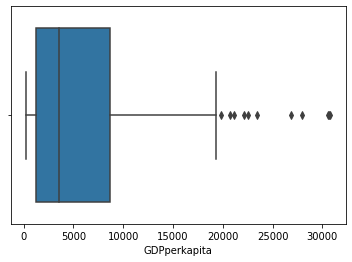

In [86]:
print("Before")
sns.boxplot(x='GDPperkapita', data=economic_data)
plt.show()

print("After")
sns.boxplot(x='GDPperkapita', data=economic_data_new)
plt.show()

Before


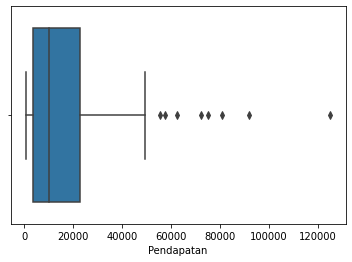

After


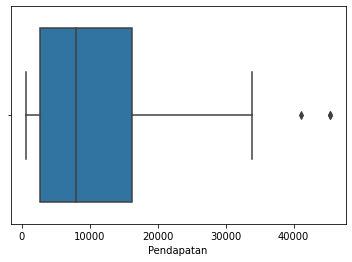

In [87]:
print("Before")
sns.boxplot(x='Pendapatan', data=economic_data)
plt.show()

print("After")
sns.boxplot(x='Pendapatan', data=economic_data_new);
plt.show()

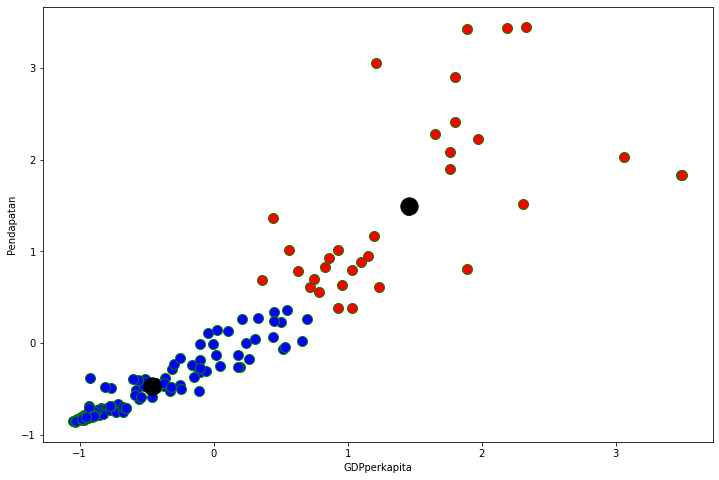

In [92]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df_std = sc.fit_transform(economic_data_new)

from sklearn.cluster import KMeans
# n=2
kmeans1 = KMeans(n_clusters = 2, random_state=42).fit(df_std)
labels1 = kmeans1.labels_

new_df = pd.DataFrame(data=df_std, columns=['GDPperkapita', 'Pendapatan'])
new_df['label1_kmeans'] = labels1

import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))

plt.scatter(new_df['GDPperkapita'][new_df.label1_kmeans == 0], new_df['Pendapatan'][new_df.label1_kmeans == 0], c='blue', s=100, edgecolor='green')
plt.scatter(new_df['GDPperkapita'][new_df.label1_kmeans == 1], new_df['Pendapatan'][new_df.label1_kmeans == 1], c='red', s=100, edgecolor='green')

plt.scatter(kmeans1.cluster_centers_[:, 0],kmeans1.cluster_centers_[:, 1], c='k', s=300 )
plt.xlabel('GDPperkapita')
plt.ylabel('Pendapatan')
plt.show()

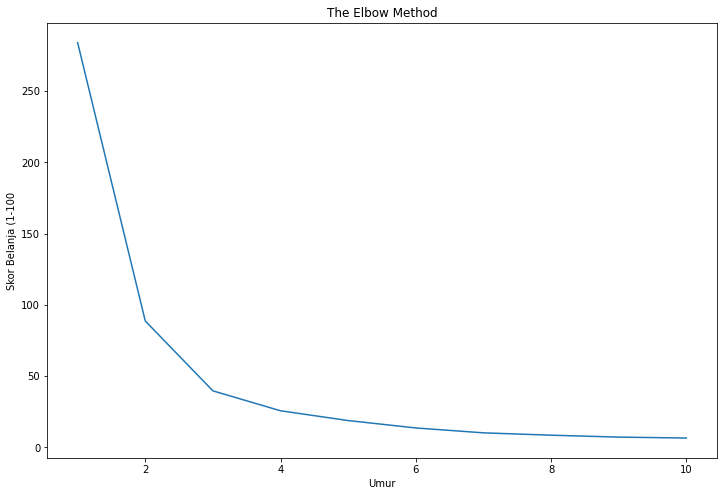

In [93]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)
  kmeans.fit(df_std)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(12,8))
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Umur')
plt.ylabel('Skor Belanja (1-100')

plt.show()

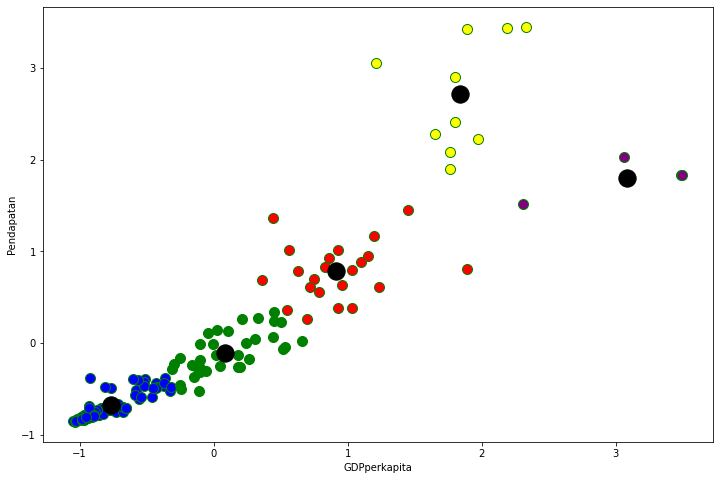

0.6547621766577557
0.5729915407953795


In [94]:
# n=5
kmeans2 = KMeans(n_clusters = 5, random_state=42).fit(df_std)
labels2 = kmeans2.labels_

new_df2 = pd.DataFrame(data=df_std, columns=['GDPperkapita', 'Pendapatan'])
new_df2['label2_kmeans'] = labels2

plt.figure(figsize=(12,8))

plt.scatter(new_df2['GDPperkapita'][new_df2.label2_kmeans == 0], new_df2['Pendapatan'][new_df2.label2_kmeans == 0], c='blue', s=100, edgecolor='green')
plt.scatter(new_df2['GDPperkapita'][new_df2.label2_kmeans == 1], new_df2['Pendapatan'][new_df2.label2_kmeans == 1], c='red', s=100, edgecolor='green')
plt.scatter(new_df2['GDPperkapita'][new_df2.label2_kmeans == 2], new_df2['Pendapatan'][new_df2.label2_kmeans == 2], c='green', s=100, edgecolor='green')
plt.scatter(new_df2['GDPperkapita'][new_df2.label2_kmeans == 3], new_df2['Pendapatan'][new_df2.label2_kmeans == 3], c='yellow', s=100, edgecolor='green')
plt.scatter(new_df2['GDPperkapita'][new_df2.label2_kmeans == 4], new_df2['Pendapatan'][new_df2.label2_kmeans == 4], c='purple', s=100, edgecolor='green')

plt.scatter(kmeans2.cluster_centers_[:, 0],kmeans2.cluster_centers_[:, 1], c='k', s=300 )
plt.xlabel('GDPperkapita')
plt.ylabel('Pendapatan')
plt.show()

from sklearn.metrics import silhouette_score

print(silhouette_score(df_std, labels=labels1))
print(silhouette_score(df_std, labels=labels2))


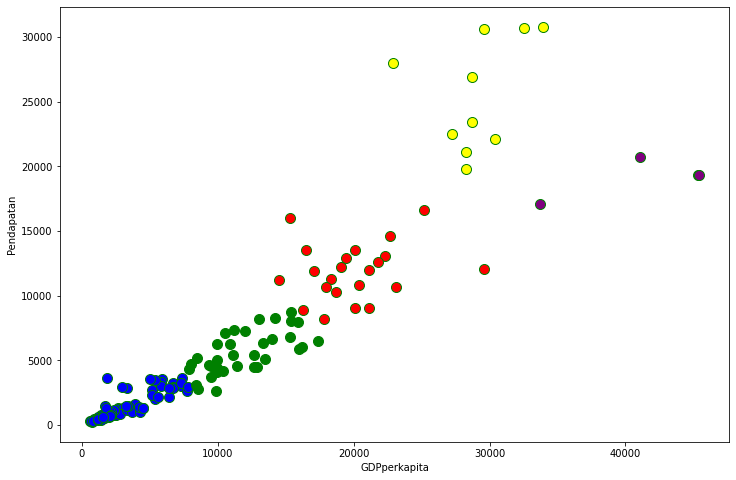

In [95]:
from sklearn.cluster import KMeans
kmeans3 = KMeans(n_clusters = 5, random_state=42).fit(df_std)
labels3 = kmeans3.labels_

new_df1 = pd.DataFrame(data=sc.inverse_transform(df_std), columns=['GDPperkapita', 'Pendapatan'])
new_df1['label3_kmeans'] = labels3

plt.figure(figsize=(12,8))

plt.scatter(new_df1['GDPperkapita'][new_df1.label3_kmeans == 0], new_df1['Pendapatan'][new_df1.label3_kmeans == 0], c='blue', s=100, edgecolor='green')
plt.scatter(new_df1['GDPperkapita'][new_df1.label3_kmeans == 1], new_df1['Pendapatan'][new_df1.label3_kmeans == 1], c='red', s=100, edgecolor='green')
plt.scatter(new_df1['GDPperkapita'][new_df1.label3_kmeans == 2], new_df1['Pendapatan'][new_df1.label3_kmeans == 2], c='green', s=100, edgecolor='green')
plt.scatter(new_df1['GDPperkapita'][new_df1.label3_kmeans == 3], new_df1['Pendapatan'][new_df1.label3_kmeans == 3], c='yellow', s=100, edgecolor='green')
plt.scatter(new_df1['GDPperkapita'][new_df1.label3_kmeans == 4], new_df1['Pendapatan'][new_df1.label3_kmeans == 4], c='purple', s=100, edgecolor='green')

plt.xlabel('GDPperkapita')
plt.ylabel('Pendapatan')
plt.show()

In [110]:
raw_data['K_means_labels'] = pd.Series(labels3).astype('object')
rec_list = raw_data[raw_data['K_means_labels']==0]
rec_list

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,K_means_labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,0
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,0
10,Bahamas,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28000,0
14,Belarus,5.5,51.4,5.61,64.5,16200,15.100,70.4,1.49,6030,0
...,...,...,...,...,...,...,...,...,...,...,...
136,Solomon Islands,28.1,49.3,8.55,81.2,1780,6.810,61.7,4.24,1290,0
137,South Africa,53.7,28.6,8.94,27.4,12000,6.350,54.3,2.59,7280,0
139,Spain,3.8,25.5,9.54,26.8,32500,0.160,81.9,1.37,30700,0
140,Sri Lanka,11.2,19.6,2.94,26.8,8560,22.800,74.4,2.20,2810,0


In [112]:
rec_list.sort_values(by=['GDPperkapita'],ascending=True)[:10].reset_index()

,index,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,K_means_labels
0,26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,0
1,88,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327,0
2,31,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446,0
3,94,Malawi,90.5,22.80,6.59,34.9,1030,12.10,53.1,5.31,459,0
4,50,Eritrea,55.2,4.79,2.66,23.3,1420,11.60,61.7,4.61,482,0
5,0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.44,56.2,5.82,553,0
6,56,Gambia,80.3,23.80,5.69,42.7,1660,4.30,65.5,5.71,562,0
7,25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.81,57.9,5.87,575,0
8,27,Cambodia,44.4,54.10,5.68,59.5,2520,3.12,66.1,2.88,786,0
9,32,Chad,150.0,36.80,4.53,43.5,1930,6.39,56.5,6.59,897,0
